# Lecture 07: Applications 1 - Simulation Studies 

<font size="5"> 

In the previous class we:
- Introduced different types of loops
- Introduced a type of structure with indendented code

<font size="5"> 

In this class we will:

- Talk about how to use simulatons for statistical inference
- Plot the results of simulation studies

## I. Import Libraries 

In [1]:
# the "numPy" library is used for mathematical operations
# the "matplotlib" library is for generating graphs
# the "pandas" library is for manipualting datasets

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## II. Visualising Random Variables 

<font size = "5" >

Consider a sample with $n$ observations

$ X = \begin{pmatrix} X_1 \\ X_2 \\ \vdots \\ X_n \end{pmatrix}.$

<font size = "5" > We can simulate from different distributions

In [3]:
# Set Sample size 
# These produce several common distributions
# A normal distribution with "loc" (mean) 7 and "scale" (standard deviation) 5
# A chi-square distribution with 1 "df" degrees of freedom
# A uniform distribution with values between -3 and 5

# Set seed for reproducibility
np.random.seed(151)

# Sample size
n = 10000 

# Simulate random variables
vec_normal = np.random.normal(loc = 7, scale = 5, size = n)
vec_chisqr = np.random.chisquare(df = 1, size = n)
vec_unif   = np.random.uniform(low = -3,high = 5, size = n)

<font size = "5">

The sample average is defined as 

$ \bar{X} = \frac{1}{n}\sum_i X_i $

In [28]:
# Check their means
print(f"Normal mean: {np.mean(vec_normal)}")
print(f"Chi-square mean: {np.mean(vec_chisqr)}")
print(f"Uniform mean: {np.mean(vec_unif)}")

Normal mean: 7.0273290325979465
Chi-square mean: 1.0051975023328465
Uniform mean: 1.0556049464433184


<font size = "5" >

Fancy printing: the `f` string

- Did you notice the `f` before the string?
- This is called (surprise!) an f-string (formatted string)
- It is a more concise and readable way to format strings
- More information can be found in the [Python documentation](https://docs.python.org/3/reference/lexical_analysis.html#f-strings)

- They work like this:
  - You write an `f` before the string (which should always be enclosed in quotes)
  - You can then embed expressions or variables inside curly braces `{}` within the string
  - We use them because they are easy to read and write
  - Let's see another example:

In [4]:
my_name = "Danilo"
courses = ["QTM 151", "QTM 350"]

print(f"Hello, my name is {my_name} and I am teaching {courses[0]} and {courses[1]} this semester.")

Hello, my name is Danilo and I am teaching QTM 151 and QTM 350 this semester.


In [5]:
# F-strings can span multiple lines using triple quotes
print(f"""Hello, my name is {my_name} 
and I am teaching 
{courses[0]} and {courses[1]} 
this semester.""")

Hello, my name is Danilo 
and I am teaching 
QTM 151 and QTM 350 
this semester.


<font size = "5" >

Multiple plots in a row (subplot)

- The normal has more of a bell shape
- The uniform is a rectangular shape

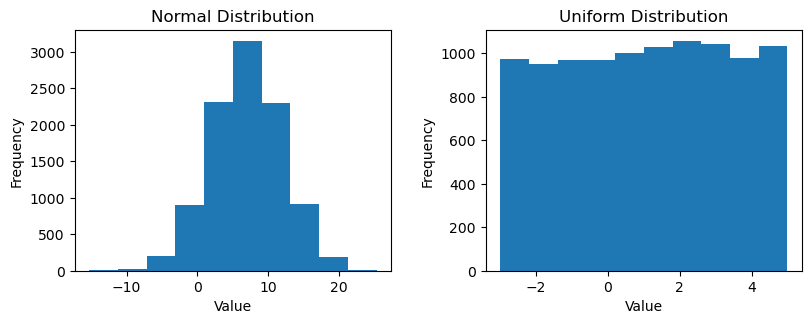

In [6]:
#------------------------ Setting up subplots----------------------------------#
# Create a plot with 1 row, 2 columns
# You will create a list of subfigures "list_subfig"
# You can choose whichever name you like
# The option "figsize" indicates the (width, height) of the graph
fig, list_subfig = plt.subplots(1, 2,figsize = (8,3))


# The tight layout option ensures that the axes are not overlapping
plt.tight_layout()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)  # Adjust the value as needed

# First Figure
list_subfig[0].hist(x = vec_normal)
list_subfig[0].set_title("Normal Distribution")
list_subfig[0].set_xlabel("Value")
list_subfig[0].set_ylabel("Frequency")

# Second Figure
list_subfig[1].hist(x = vec_unif)
list_subfig[1].set_title("Uniform Distribution")
list_subfig[1].set_xlabel("Value")
list_subfig[1].set_ylabel("Frequency")
plt.show()

# Note:
# Use the set_title() function for the title of subfigures
# Similarly, use "set_xlabel()" and "set_ylabel()"



<font size = "5">

Try it yourself!

- Do a version with three plots in the same row
- What happens if you remove the "plt.tight_layout()" command?
- What happens if you change the "figsize"?

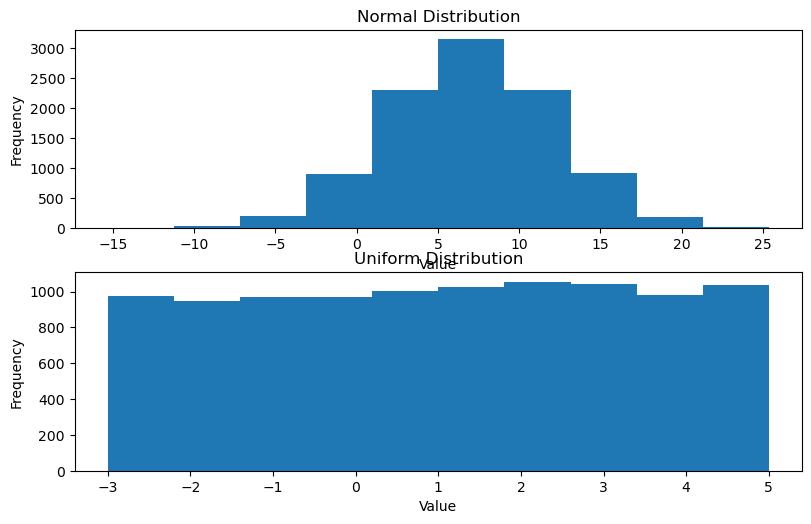

In [12]:
# Write down your solution

#------------------------ Setting up subplots----------------------------------#
# Create a plot with 1 row, 2 columns
# You will create a list of subfigures "list_subfig"
# You can choose whichever name you like
# The option "figsize" indicates the (width,height) of the graph

fig, list_subfig = plt.subplots(2, 1,figsize = (8,5))


# The tight layout option ensures that the axes are not overlapping
plt.tight_layout()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)  # Adjust the value as needed

# First Figure
list_subfig[0].hist(x = vec_normal)
list_subfig[0].set_title("Normal Distribution")
list_subfig[0].set_xlabel("Value")
list_subfig[0].set_ylabel("Frequency")

# Second Figure
list_subfig[1].hist(x = vec_unif)
list_subfig[1].set_title("Uniform Distribution")
list_subfig[1].set_xlabel("Value")
list_subfig[1].set_ylabel("Frequency")
plt.show()



## III. Sequences

<font size = "5">

Simple sequences: $[0,1,2,...,n-1]$

In [21]:
# Use `list(range())` to create the following lists:
# Create a list with the numbers from 0 to 9
# Create a list with the odd numbers from 1 to 9
print(list(range(10)))
print(list(range(1, 10, 2)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 3, 5, 7, 9]


## IV. Nested Loops 

- We can nest loops inside each other to iterate over multiple dimensions 🤯
- The inner loop runs to completion for each iteration of the outer loop
- This is useful when we need to iterate over a matrix or a list of lists
- The syntax is simple: [just write a loop inside another loop](https://www.w3schools.com/python/python_nested_loops.asp)
- The inner loop is indented twice: once for the outer loop and once for the inner loop

In [22]:
for i in range(3):
    for j in range(2):
        print(f"i = {i}, j = {j}")

i = 0, j = 0
i = 0, j = 1
i = 1, j = 0
i = 1, j = 1
i = 2, j = 0
i = 2, j = 1


<font size = "5">

What happens to $\bar{X}$ with different $n$?

- The Central Limit Theorem makes a prediction!
- It says that the distribution will have a bell shape with higher $n$.

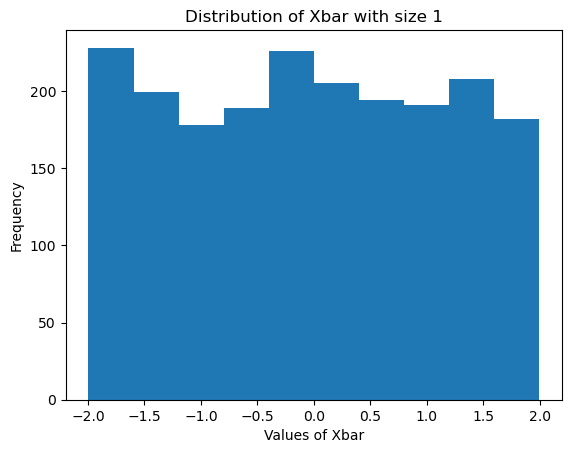

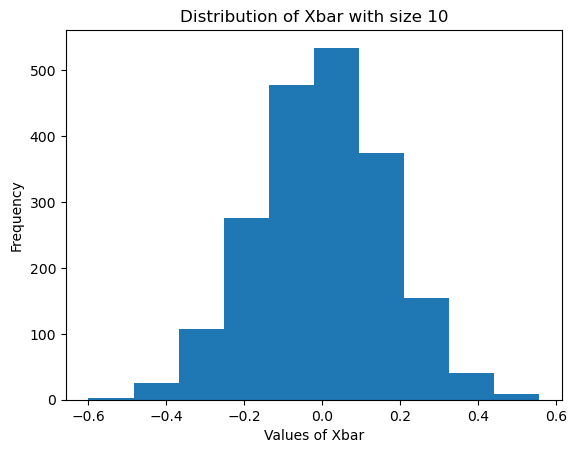

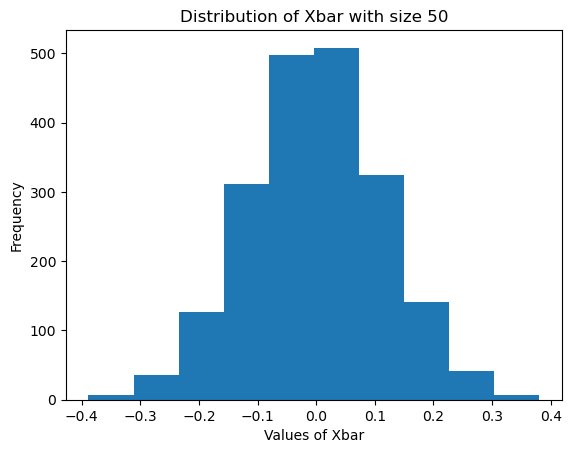

In [23]:
# One way is to write this with repeated code chunks
# Each time will start the process of generating new data from scratch.

num_simulations = 2000

# Simulate with sample size one
sample_size = 1
vec_xbar = [None] * num_simulations
for iteration in range(num_simulations):
    vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
    vec_xbar[iteration] = vec_unif.mean()
plt.hist(vec_xbar)
plt.title("Distribution of Xbar with size 1")
plt.ylabel("Frequency")
plt.xlabel("Values of Xbar")
plt.show()

# Simulate with sample size 50
sample_size = 50
vec_xbar = [None] * num_simulations
for iteration in range(num_simulations):
    vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
    vec_xbar[iteration] = vec_unif.mean()
plt.hist(vec_xbar)
plt.title("Distribution of Xbar with size 10")
plt.ylabel("Frequency")
plt.xlabel("Values of Xbar")
plt.show()

# Simulate with sample size 100
sample_size = 100
vec_xbar = [None] * num_simulations
for iteration in range(num_simulations):
    vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
    vec_xbar[iteration] = vec_unif.mean()
plt.hist(vec_xbar)
plt.title("Distribution of Xbar with size 50")
plt.ylabel("Frequency")
plt.xlabel("Values of Xbar")
plt.show()



<font size = "5">
Nested Loops

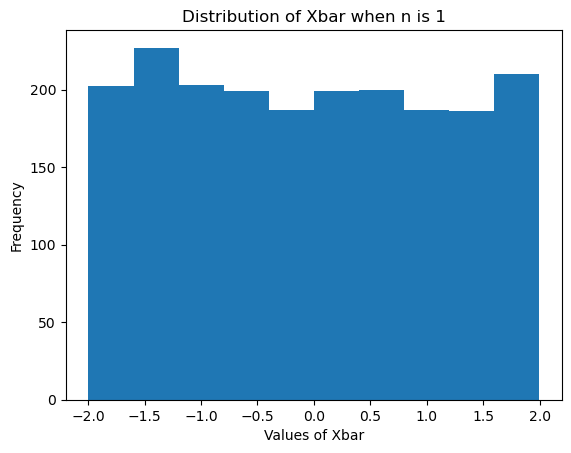

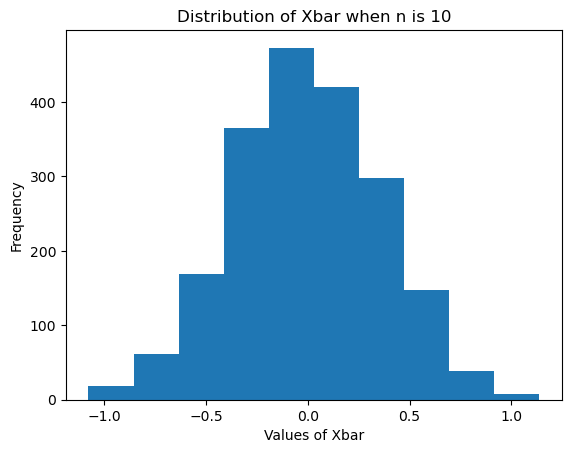

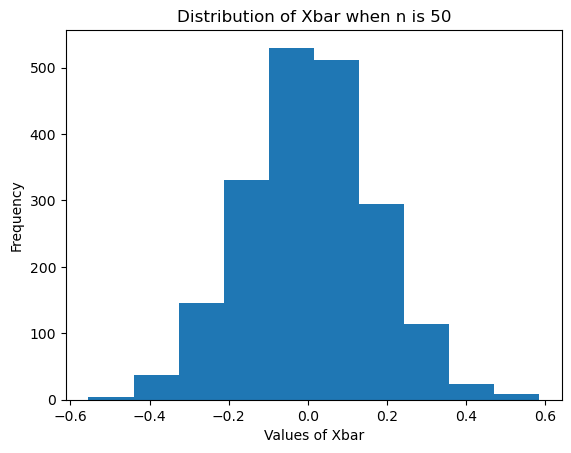

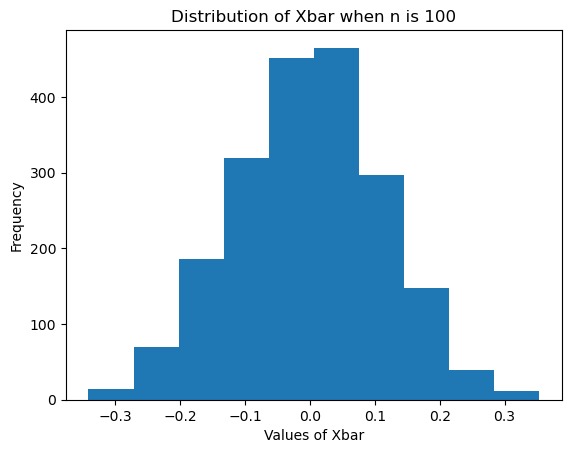

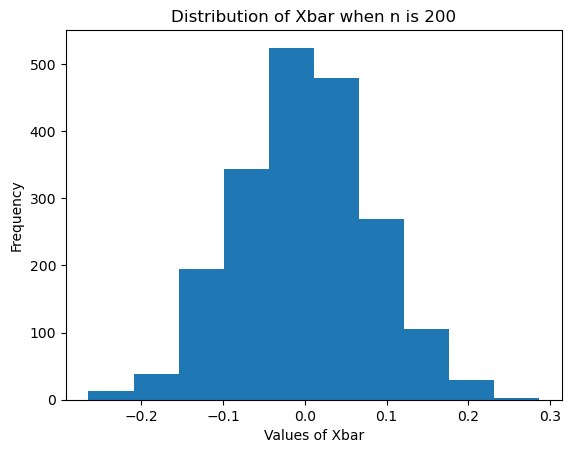

In [24]:
# To evaluate different sample size which just have to write a for-loop within 
# another for-loop

num_simulations = 2000
sample_size_list = [1,10,50,100,200]

for sample_size in sample_size_list:

    # The following command a vector null values, of length "num_simulations"
    vec_xbar = [None] * num_simulations
    
    for iteration in range(num_simulations):
            vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
            vec_xbar[iteration] = vec_unif.mean()
    plt.hist(vec_xbar)
    plt.title("Distribution of Xbar when n is " + str(sample_size))
    plt.ylabel("Frequency")
    plt.xlabel("Values of Xbar")
    plt.show()

    
    

<font size = "5">
Try it yourself!

- Repeat the above simulation with a few changes
- Use a Chi-square distribution with (df = 1) instead of a normal

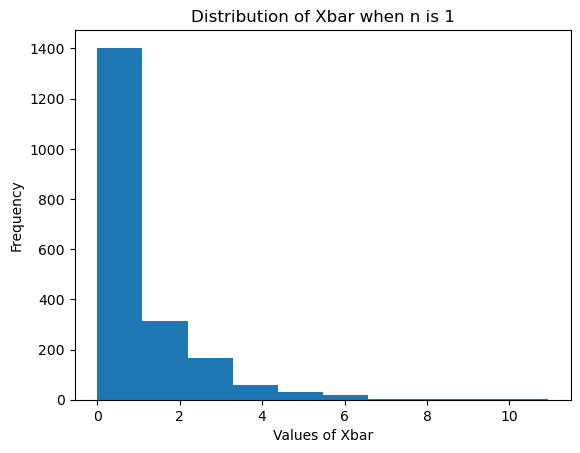

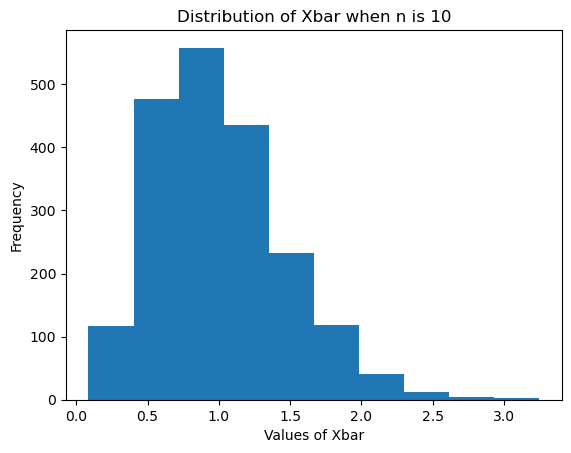

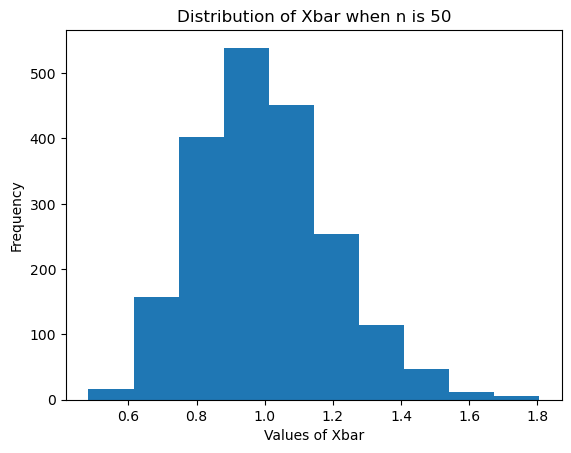

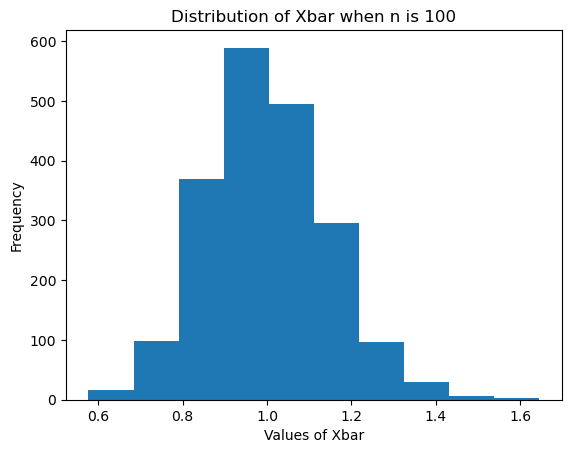

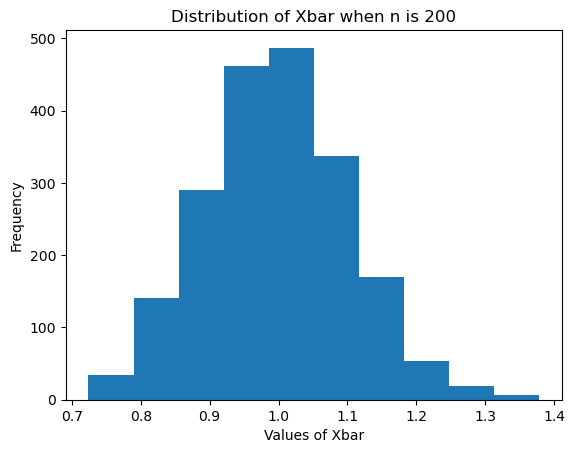

In [29]:

# To evaluate different sample size which just have to write a for-loop within 
# another for-loop
num_simulations = 2000
sample_size_list = [1,10,50,100,200]

for sample_size in sample_size_list:

    # The following command a vector null values, of length "num_simulations"
    vec_xbar = [None] * num_simulations
    
    for iteration in range(num_simulations):
            vec_unif  = np.random.chisquare(df=1, size = sample_size)
            vec_xbar[iteration] = vec_unif.mean()
    plt.hist(vec_xbar)
    plt.title("Distribution of Xbar when n is " + str(sample_size))
    plt.ylabel("Frequency")
    plt.xlabel("Values of Xbar")
    plt.show()

<font size = "5">

Try it yourself!

- Write code that puts all the figures in the same row

In [ ]:
# Write your own solution
# To evaluate different sample size which just have to write a for-loop within 
# another for-loop


## V. (Optional) Loops + If/else 

<font size = "5">

The proportion of "True" statements in a boolean list

In [25]:
# Define a list with True/False values
list_boolean = [True,False,True,False,False]
np.mean(list_boolean)


0.4

<font size = "5">

Let "sample_stdv" be the sample standard deviation of $X_i$.




In [26]:
# Parameters of a normal random variable
n                 = 10000
population_mean   = 2
population_stdv   = 5

# Create random variable and produce summary statistics
X           = np.random.normal(loc = 2,scale = 5,size = n)
Xbar        = X.mean()
sample_stdv = X.std()

# Check that the sample and standard deviation are close to their
# population values
print(Xbar)
print(sample_stdv)


1.999912254838843
4.991239621098515


<font size = "5">

A 95\% normal confidence interval is defined by $\ldots$

- lower_bound = $\bar{X} -1.96 \times  \frac{\text{sample\_stdv}}{\sqrt{n}}$.
- upper_bound = $\bar{X} + 1.96 \times \frac{\text{sample\_stdv}}{\sqrt{n}}$.

In [27]:
# Compute new variables for the upper and lower bound

lower_bound = Xbar - 1.96*(sample_stdv / np.sqrt(n))
upper_bound = Xbar + 1.96*(sample_stdv / np.sqrt(n))


<font size = "5">
Try it yourself! Write an if/else that checks whether <br>

lower_bound $\quad \le \quad $ population_mean $\quad \le \quad$ upper_bound


In [16]:
# Write your own code



<font size ="5">

Try it yourself! Test whether this is a 95% confidence interval



<font size = "3">

Procedure:
- Create a variable called "num_simulations" with value 1000
- Create the simulation parameters "n", "population_mean", "populations_stdv".
- Create an empty vector called "list_test_confidenceinterval".
- Create a loop. At each iteration:

    - Create a vector of normal random variables of size "n".
    - Create a variable "test_confidenceinterval", which tests:
    
        lower_bound $\quad \le \quad $ population_mean $\quad \le \quad$ upper_bound
    - Append "test_confidenceinterval" to the above list
    
- Compute the mean of "list_test_confidenceinterval"

Note: The final result should be close to 95%.



In [17]:
# Write your own  code:




